In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# !pip install tensorflow
# import pickle
# import tensorflow as tf
#  UpSampling2D, BatchNormalization
sys.path.insert(0,'../..')
from gp2 import Runner

In [56]:
!locate gp2


/lib/modules/5.4.0-104-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-104-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-105-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-105-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/raid/alphafold_data3/pdb_mmcif/mmcif_files/1gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/3gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/4gp2.cif
/raid/alphafold_data3/pdb_mmcif/mmcif_files/6gp2.cif
/usr/src/linux-headers-5.4.0-104/include/linux/input/gp2ap002a00f.h
/usr/src/linux-headers-5.4.0-104-generic/include/config/gp2ap020a00f.h
/usr/src/linux-headers-5.4.0-104-generic/include/config/input/gp2a.h
/usr

In [3]:

R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpc8_x2facGP2
Verbose mode active!


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_images.npy')
masks = np.load('/hpcstor6/scratch01/r/ryan.zurrin001/gp2_ocular_unnormalized_masks.npy')

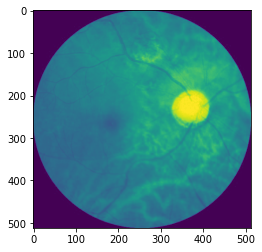

In [5]:
plt.imshow(images[500])

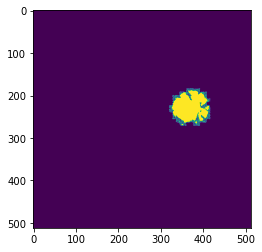

In [6]:
plt.imshow(masks[500])

In [7]:
len(images)

6392

In [8]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [9]:
#
#
R.setup_data(images, masks, dataset_size=6392, weights=weights)

Weights OK!


In [10]:
RUNS = 5

In [11]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')

***
RUN: 0
Epoch 1/100
5/5 [==============================] - 33s 4s/step - loss: 1.2051 - dice_coeff: 0.4044 - val_loss: 1.4788 - val_dice_coeff: 0.1949
Epoch 2/100
5/5 [==============================] - 7s 2s/step - loss: 0.9047 - dice_coeff: 0.5364 - val_loss: 1.4491 - val_dice_coeff: 0.2313
Epoch 3/100
5/5 [==============================] - 7s 2s/step - loss: 0.8031 - dice_coeff: 0.5837 - val_loss: 1.4436 - val_dice_coeff: 0.2472
Epoch 4/100
5/5 [==============================] - 7s 2s/step - loss: 0.7536 - dice_coeff: 0.6075 - val_loss: 1.4414 - val_dice_coeff: 0.2581
Epoch 5/100
5/5 [==============================] - 7s 2s/step - loss: 0.7277 - dice_coeff: 0.6190 - val_loss: 1.4400 - val_dice_coeff: 0.2688
Epoch 6/100
5/5 [==============================] - 7s 2s/step - loss: 0.7343 - dice_coeff: 0.6177 - val_loss: 1.4371 - val_dice_coeff: 0.2849
Epoch 7/100
5/5 [==============================] - 7s 2s/step - loss: 0.6929 - dice_coeff: 0.6350 - val_loss: 1.4399 - val_dice_coeff: 0

In [12]:
R.classifier_scores

[[0.8191587328910828, 0.527137041091919],
 [0.8818859457969666, 0.4439493715763092],
 [0.7893762588500977, 0.5074543356895447],
 [0.6917669773101807, 0.5722396969795227],
 [0.6467090249061584, 0.6094645857810974]]

In [13]:
R.discriminator_scores

[[0.02156389132142067, 0.9921671152114868],
 [0.1190062165260315, 0.9608355164527893],
 [0.07871269434690475, 0.9738903641700745],
 [0.17578375339508057, 0.9791122674942017],
 [0.10373720526695251, 0.9660574197769165]]

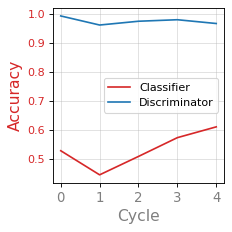

In [14]:
R.plot()

In [15]:
R.classifier_scores

[[0.8191587328910828, 0.527137041091919],
 [0.8818859457969666, 0.4439493715763092],
 [0.7893762588500977, 0.5074543356895447],
 [0.6917669773101807, 0.5722396969795227],
 [0.6467090249061584, 0.6094645857810974]]

In [16]:
R.discriminator_scores

[[0.02156389132142067, 0.9921671152114868],
 [0.1190062165260315, 0.9608355164527893],
 [0.07871269434690475, 0.9738903641700745],
 [0.17578375339508057, 0.9791122674942017],
 [0.10373720526695251, 0.9660574197769165]]

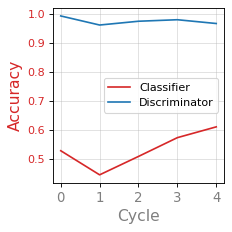

In [17]:
R.plot()

In [40]:
import tensorflow as tf

# Set memory growth for each GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)